# Лабораторная работа №2 - Линейная нейронная сеть. Правило обучения Уидроу-Хоффа
Выполнил: Степанов Данила Михайлович

Группа: М8О-407Б-20

Вариант: 22

## Цель работы
Целью работы является исследование свойств линейной нейронной сети и алгоритмов ее
обучения, применение сети в задачах аппроксимации и фильтрации.

## Решение

Часть 1 - использование линейной нейронной сети для выполнения одношагового прогноза

Подключим необходимые модули

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Архитектура модели для выполнения многошагового прогноза

In [ ]:
class NStepPredictionModel(nn.Module):
  def __init__(self, out_features, d=5):
    super().__init__()
    self.lin1 = nn.Linear(d, out_features)

  def forward(self, x):
    x = self.lin1(x)
    return x

Заданная функция

In [ ]:
x = lambda t: np.cos(np.cos(t) * t ** 2 - 2 * t + 7)

Заданные параметры

In [ ]:
start = 0.0
finish = 4.0
step = 0.02
d = 5

Функция для генерации данных

In [ ]:
def generate_samples(start, finish, input_fun, output_fun, step, d, prediction_size=1):
  samples_size = int((finish - start) / step) + 1
  t = [start + i * step for i in range(samples_size)]
  X, y = [], []
  datasets = [(X.append(list(map(lambda obj: input_fun(obj), t[i:i+d]))), y.append(list(map(lambda obj: output_fun(obj), t[i + d:i + d + prediction_size])))) for i in range(len(t) - prediction_size - d + 1)]

  x_values = [] # values of t in which we measure function value

  def add_points(cur_slice):
    res = [x_values.append(x) for x in cur_slice]

  arguments = [add_points(t[i + d:i + d + prediction_size]) for i in range(len(t) - prediction_size - d + 1)]

  return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32), np.array(t[d:])

X, y, t = generate_samples(start, finish, x, x, step, d)
print("X shape: ", X.shape)
print("y shape: ", y.shape)
print("t shape: ", len(t))

size of t=== 196
X shape:  torch.Size([196, 5])
y shape:  torch.Size([196, 1])
t shape:  196


Функция для обучения модели

In [ ]:
def train(model, opt, critetion, X, y, epochs=100):
  model.train()
  history = []
  for epoch in range(epochs):
    opt.zero_grad()
    outputs = model(X)
    loss = critetion(outputs, y)
    history.append(loss.item())
    if epoch % 100 == 0:
      print("epoch: ", epoch)
      print("loss: ", loss.item())
    loss.backward()
    opt.step()
  return history


Определение модели, оптимайзера и функции потерь и обучение нейронной сети

In [ ]:
model = NStepPredictionModel(1)

opt = torch.optim.SGD(model.parameters(), lr=0.05)
criterion = nn.MSELoss()

epochs = 1000

history = train(model, opt, criterion, X, y, epochs=epochs)

epoch:  0
loss:  1.1479915380477905
epoch:  100
loss:  0.0195024274289608
epoch:  200
loss:  0.0060957628302276134
epoch:  300
loss:  0.0026995516382157803
epoch:  400
loss:  0.001833247602917254
epoch:  500
loss:  0.001606361591257155
epoch:  600
loss:  0.0015411273343488574
epoch:  700
loss:  0.0015167997917160392
epoch:  800
loss:  0.0015028654597699642
epoch:  900
loss:  0.0014916117070242763


Построим получившуюся кривую потерь

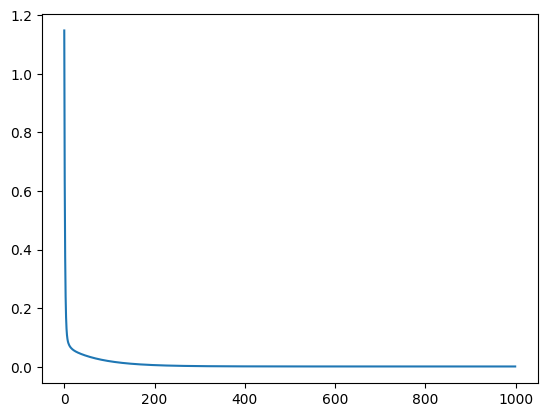

In [ ]:
plt.plot(range(epochs), history)

Оценим получившийся результат

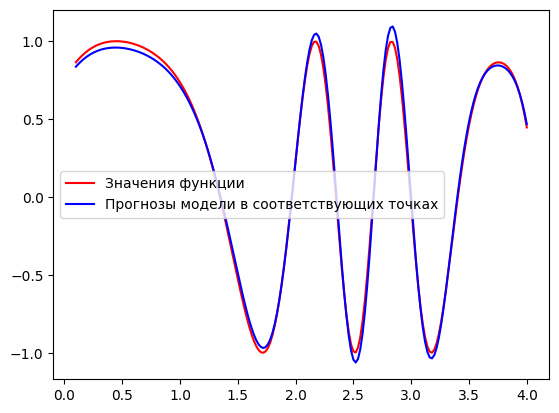

In [ ]:
def evaluate_result(model, fun, start, finish, step, X, y, d=5):
  model.eval()
  samples_size = int((finish - start) / step) + 1
  t = [start + i * step for i in range(samples_size)]
  x = [t[i+d] for i in range(len(t) - d)]
  outputs = model(X)
  plt.plot(x, y, c="red")
  plt.plot(x, outputs.detach().numpy(), c="blue")
  plt.legend(["Значения функции", "Прогнозы модели в соответствующих точках"])

evaluate_result(model, x, start, finish, step, X, y)

Часть 2 - использование линейной модели для многошагового прогноза

In [ ]:
model = NStepPredictionModel(5, d=3)
criterion = nn.MSELoss()
opt = torch.optim.SGD(model.parameters(), lr=0.05)

In [ ]:
X, y, t = generate_samples(start, finish, x, x, step, 3, prediction_size=5)
print("X shape: ", X.shape)
print("y shape: ", y.shape)
print("t shape: ", len(t))

size of t=== 196
X shape:  torch.Size([194, 3])
y shape:  torch.Size([194, 5])
t shape:  198


In [ ]:
def get_data_from_tensor(y):
  y = y.detach().clone().numpy()
  values = [y[i][0] for i in range(y.shape[0])]
  return values

#get_data_from_tensor(y)

[0.8251051,
 0.84555405,
 0.8644381,
 0.8818094,
 0.8977229,
 0.9122357,
 0.92540586,
 0.9372924,
 0.94795424,
 0.9574499,
 0.96583694,
 0.97317135,
 0.97950745,
 0.9848973,
 0.98939043,
 0.99303347,
 0.9958702,
 0.9979409,
 0.9992825,
 0.9999283,
 0.9999078,
 0.99924654,
 0.9979661,
 0.99608403,
 0.99361354,
 0.9905637,
 0.986939,
 0.98273987,
 0.97796196,
 0.9725965,
 0.96663,
 0.9600443,
 0.9528166,
 0.94491905,
 0.93631893,
 0.9269786,
 0.91685534,
 0.9059014,
 0.8940637,
 0.88128424,
 0.8674997,
 0.8526419,
 0.8366373,
 0.8194078,
 0.80087066,
 0.78093857,
 0.7595204,
 0.73652154,
 0.7118445,
 0.68538976,
 0.6570567,
 0.6267446,
 0.59435415,
 0.55978894,
 0.5229573,
 0.48377442,
 0.44216475,
 0.39806467,
 0.35142556,
 0.30221722,
 0.2504315,
 0.19608638,
 0.13923024,
 0.07994652,
 0.01835853,
 -0.04536557,
 -0.11100772,
 -0.17829497,
 -0.24689461,
 -0.31640974,
 -0.38637528,
 -0.4562548,
 -0.52543837,
 -0.59324163,
 -0.65890634,
 -0.7216034,
 -0.7804372,
 -0.83445317,
 -0.8826483,

Обучим модель

In [ ]:
epochs = 1000

history = train(model, opt, criterion, X, y, epochs=epochs)

epoch:  0
loss:  0.5845325589179993
epoch:  100
loss:  0.11249461770057678
epoch:  200
loss:  0.10195311903953552
epoch:  300
loss:  0.09665846824645996
epoch:  400
loss:  0.09184807538986206
epoch:  500
loss:  0.08730997890233994
epoch:  600
loss:  0.08302132040262222
epoch:  700
loss:  0.07896807044744492
epoch:  800
loss:  0.07513727992773056
epoch:  900
loss:  0.0715167298913002


Оценим кривую потерь

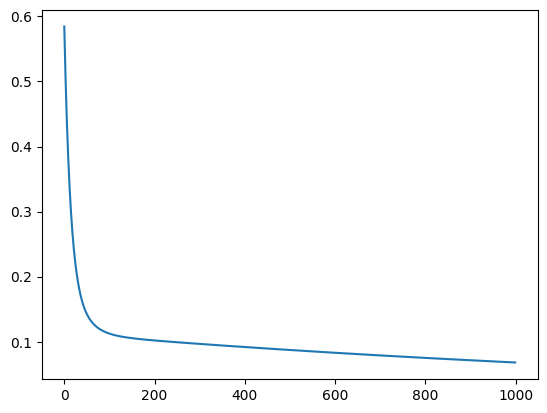

In [ ]:
plt.plot(range(epochs), history)

Оценим результат при многошаговом прогнозировании

t len: 198
shape new_outputs:  194
shape or y:  194


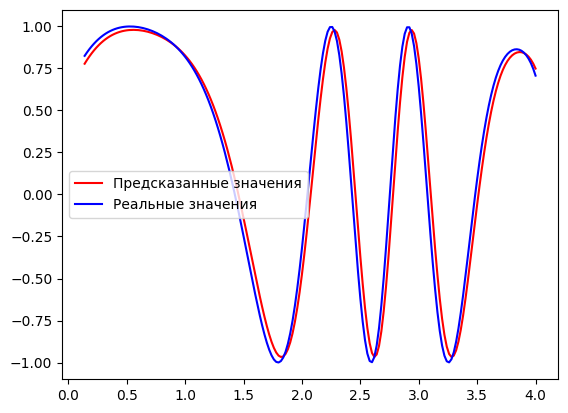

In [ ]:
def evaluate_result_for_multiple_steps(model, fun, start, finish, step, X, y, t, d=3, prediction_size=5):
  model.eval()
  outputs = model(X).clone().detach()
  new_outputs = get_data_from_tensor(outputs)
  new_y = get_data_from_tensor(y)
  print("t len:", len(t))
  print("shape new_outputs: ", len(new_outputs))
  print("shape or y: ", len(new_y))
  plt.plot(t[4:], new_outputs, c="red")
  plt.plot(t[4:], new_y, c="blue")
  plt.legend(["Предсказанные значения", "Реальные значения"])


evaluate_result_for_multiple_steps(model, x, start, finish, step, X, y, t)

Часть 3 - использование линейной модели в качестве адаптивного фильтра

In [ ]:
input_signal = lambda t: np.sin(t ** 2 - 10 * t + 3)
output_signal = lambda t: (1 / 6.) * np.sin(t ** 2 - 10 * t + np.pi / 4)

start = 0
finish = 6
step = 0.025
d = 4

X, y = generate_samples(start, finish, input_signal, output_signal, step, d)
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  torch.Size([237, 4])
y shape:  torch.Size([237, 1])


In [ ]:
model = NStepPredictionModel(1, d=4)
opt = torch.optim.SGD(model.parameters(), lr=0.05)
criterion = nn.MSELoss()

epochs = 1000

history = train(model, opt, criterion, X, y, epochs=epochs)

epoch:  0
loss:  0.1474114954471588
epoch:  100
loss:  0.00990163441747427
epoch:  200
loss:  0.006551328115165234
epoch:  300
loss:  0.0050934674218297005
epoch:  400
loss:  0.00445908447727561
epoch:  500
loss:  0.004183029290288687
epoch:  600
loss:  0.004062897991389036
epoch:  700
loss:  0.0040106140077114105
epoch:  800
loss:  0.00398785388097167
epoch:  900
loss:  0.003977940417826176


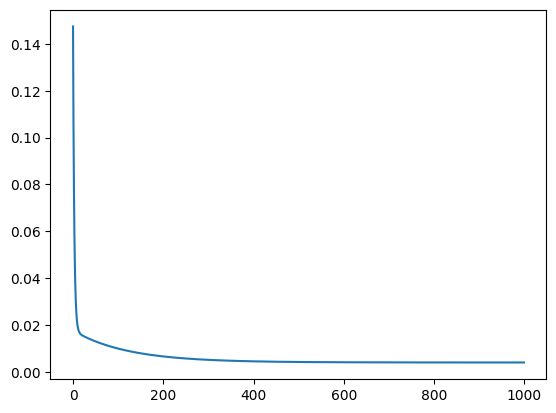

In [ ]:
plt.plot(range(epochs), history)

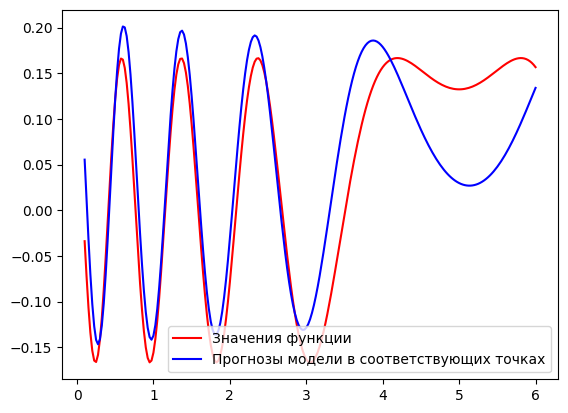

In [ ]:
evaluate_result(model, output_signal, start, finish, step, X, y, d=4)

###Вывод:
Линейная нейронная сеть отлично выполняет одношаговый и многошаговый прогноз для прогнозирования следующих значений функции. Также модель служит отличным адаптивным фильтром, способным убрать шум из полезного сигнала.